In [2]:
# -*- coding: utf-8 -*-
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ht
import CoolProp as cp
import fluids

In [17]:
################
#     DATOS    #
################
L = 10e-3
b = 25e-3
A = L*b
qw = 0.20
Tinf = 20
for DeltaT in np.arange(3,)
DeltaT = 5

data_out = []
for qw in np.arange(0.10,0.40,0.02):

    hc = qw/(2*A*DeltaT)

    lambda1  = cp.CoolProp.PropsSI('L','T',273+Tinf+DeltaT,'P',101.325e3,'Air')
    Pr = cp.CoolProp.PropsSI('Prandtl','T',273+Tinf+DeltaT,'P',101.325e3,'Air')
    rho = cp.CoolProp.PropsSI('D','T',273+Tinf+DeltaT,'P',101.325e3,'Air')
    mu = cp.CoolProp.PropsSI('V','T',273+Tinf+DeltaT,'P',101.325e3,'Air')
    Nu = hc*L/lambda1

    #Nu = 0.664*Re**0.5*Pr**1/3
    Re = ((Nu*Pr**-(1/3))/0.664)**2
    U = Re * mu/rho/L
    data_out.append([qw,U])
qw,U = np.asarray(data_out).T

<IPython.core.display.Javascript object>


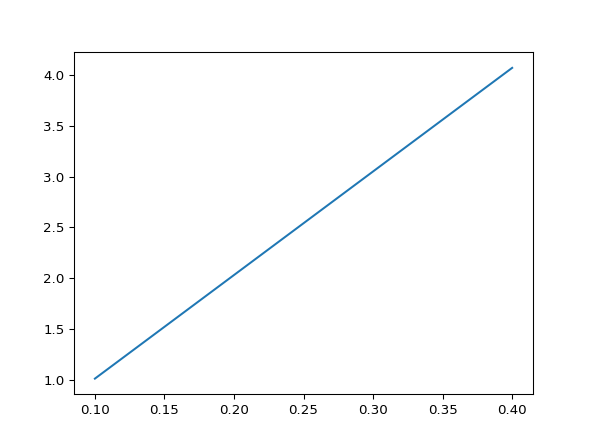

In [19]:
fig0,ax0  =  plt.subplots()
ax0.plot(qw,U**0.5)

In [256]:
#U dentro de [800,1600]
U = 700
A = UA/U

D = 25.4e-3
e = 9e-4
Di = D-2*e

Ntubos_0  = np.int(A / (np.pi*D*L_tubos))

print('Area propuesta = %.2f'%A)

Area propuesta = 24.52


In [259]:
#Proponemos Re~10000
Re_design = 1e4
m_t = m_c  # fluido caliente por tubos
#Red = 4*m_t*Npasotubos / (np.pi*D*Ntubos )
Npasotubos =  Re_design*(np.pi*Di*Ntubos_0*mu_c ) / (4*m_t)

Npasotubos = np.ceil(Npasotubos)+1

print('N tubos = %0d    N paso tubos = %0d'%(Ntubos_0,Npasotubos))


N tubos = 204    N paso tubos = 6


In [261]:
Dcarcasa2 = ht.DBundle_for_Ntubes_Phadkeb(Ntubos_0, D, 1.25*25e-3, Npasotubos, angle=90)

print('Diametro Carcasa = %.2f\'\''%(Dcarcasa2/25.4e-3))

Dcarcasa = 23.25*25.4e-3 ##el valor mas cercano a Dcarcasa2
Do = D
pitch = 1.25*25.4e-3


Ntubos = ht.Ntubes(Dcarcasa, D, pitch, Ntp=Npasotubos, angle=90, Method=None)

print('Diametro Carcasa final = %.2f\'\''%(Dcarcasa/25.4e-3))
print('Numero de tubos = %0d'%(Ntubos))

Diametro Carcasa = 23.28''
Diametro Carcasa final = 23.25''
Numero de tubos = 192


Arreglo cuadrado dX= 1.25'' D=1'' carcasa 23.25''
determina Ntubos en su interior. Se va probando parámetros para ajustar el valor inicial
Ntubos_0

In [262]:
A_real = np.pi*L_tubos*D*Ntubos
print('Areal real = %.2f m2'%A_real)

Areal real = 22.98 m2


In [263]:
Re_d = 4*m_t*Npasotubos / (np.pi*D*Ntubos*mu_c )
print('Reynolds = %.f'%Re_d)

Pr_c = cp.CoolProp.PropsSI('PRANDTL','T',273+Tc_media0,'P',101.325e3,'Water')
k_c = cp.CoolProp.PropsSI('L','T',273+Tc_media0,'P',101.325e3,'Water')

Reynolds = 14305


In [264]:
Nu_c = ht.conv_internal.turbulent_Colburn(Re_d,Pr_c)
h_c = Nu_c*k_c/Di

In [265]:
# En la carcasa

B = 0.25*Dcarcasa

#Pag 76 Cao, Dequivalente
Pt = pitch
c = (1.25-1)*25.4e-3
As = Dcarcasa*c*B/Pt
Gs = m_f / As


Deq = 4*(pitch**2-np.pi*D**2/4) / (np.pi*D)
Aeq =  Deq**2*np.pi/4*Ntubos*Npasotubos/4

Pr_f = cp.CoolProp.PropsSI('PRANDTL','T',273+Tf_media,'P',101.325e3,'Water')
k_f = cp.CoolProp.PropsSI('L','T',273+Tf_media,'P',101.325e3,'Water')
mu_f = cp.CoolProp.PropsSI('V','T',273+Tf_media,'P',101.325e3,'Water')

Re_f = Deq*m_f/mu_f/Aeq

Re_f = Deq*Gs/mu_f
Nu_f = 0.36*Re_f**0.55*Pr_f**0.3333

h_f = Nu_f*k_f/Deq

print('hf = %.2f   hc=%.2f'%(h_f,h_c))

hf = 2873.42   hc=1923.79


In [306]:
# Temperatura de pared Tw

# (Tcm-Tw)*A*h_c = (Tw-Tfm) *A*h_f
#Tw*h_c+Tw*h_f = Tcm*h_c + Tfm*h_f

Tw = (h_c*Tc_media0+h_f*Tf_media) / (h_c+h_f )
#con este valor se corrigen las propiedades de los fluidos

Tcmedia = (Tc_media0+Tw)/2
Tfmedia = (Tf_media+Tw)/2

Pr_f = cp.CoolProp.PropsSI('PRANDTL','T',273+Tfmedia,'P',101.325e3,'Water')
k_f = cp.CoolProp.PropsSI('L','T',273+Tfmedia,'P',101.325e3,'Water')
mu_f = cp.CoolProp.PropsSI('V','T',273+Tfmedia,'P',101.325e3,'Water')

Pr_c = cp.CoolProp.PropsSI('PRANDTL','T',273+Tcmedia,'P',101.325e3,'Water')
k_c = cp.CoolProp.PropsSI('L','T',273+Tcmedia,'P',101.325e3,'Water')
mu_c = cp.CoolProp.PropsSI('V','T',273+Tcmedia,'P',101.325e3,'Water')
rho_c = cp.CoolProp.PropsSI('D','T',273+Tcmedia,'P',101.325e3,'Water')
rho_f = cp.CoolProp.PropsSI('D','T',273+Tfmedia,'P',101.325e3,'Water')

mu_w = cp.CoolProp.PropsSI('V','T',273+Tw,'P',101.325e3,'Water')


In [307]:
Re_f = Deq*m_f/mu_f/Aeq

Re_f = Deq*Gs/mu_f
Nu_f = 0.36*Re_f**0.55*Pr_f**0.3333

h_f = Nu_f*k_f/Deq

Nu_c = ht.conv_internal.turbulent_Colburn(Re_d,Pr_c)
h_c = Nu_c*k_c/Di
print('hf = %.2f   hc=%.2f'%(h_f,h_c))

hf = 2970.74   hc=1993.10


In [308]:
Ulimpio = 1 / (D/Di/h_c+1/h_f )
U = 1 / (1/Ulimpio + Rf *(1+D/Di))



A_calculo = Q / (U*dTlm*Ft)

print('U=%.2f   Acalculo = %.2f'%(U,A_calculo))
print('A real inicial %.2f'%A_real)

U=774.07   Acalculo = 22.17
A real inicial 22.98


In [309]:
# Caida de presion

# Calculo para flujo en tubos
roughness = fluids.roughness_Farshad('Carbon steel, bare', D=D)

f_c = fluids.friction.friction_factor(Re=Re_d, eD=roughness/Di)

f_c2 = 1.2*(0.0014+0.125/Re_d**.32)

Gtubos = m_c*Npasotubos*4 / (Ntubos*np.pi*Di**2)


Delta_p_friccion = 4*f_c*Npasotubos*L_tubos*Gtubos**2/(2*Di*rho_c)*(mu_c/mu_w)**-0.14

Delta_p_cabezales = 4*Npasotubos*Gtubos**2/rho_c/2

Delta_p_tubos = Delta_p_cabezales+Delta_p_friccion

print('factor friccion tubos = %4f '%f_c)
print('Gtubos = %.1f'%Gtubos)
print('Delta p friccion = %.2f'%Delta_p_friccion)
print('Delta p cabezales = %.2f'%Delta_p_cabezales)
print('Delta p tubos = %.2f'%Delta_p_tubos)

factor friccion tubos = 0.030748 
Gtubos = 350.1
Delta p friccion = 2971.88
Delta p cabezales = 1489.85
Delta p tubos = 4461.73


In [327]:
#calculo para flujo en carcasa


LSpacing = Dcarcasa*0.25
NBaffles = np.floor(L_tubos / LSpacing)

Delta_p_carcasa = ht.conv_tube_bank.dP_Kern(m_f, rho_f, mu_f, Dcarcasa, LSpacing, pitch, D, NBaffles, mu_w=mu_w)
print('Delta p carcasa = %.1f'%Delta_p_carcasa)


Delta p carcasa = 6280.5
